# 6 k-Nearest-Neighbors

Follow the notebook to understand the background and implementation of k-nearest neighbors on two different datasets using built-in libraries and functions from skLearn followed by a visualization of their associated graphs and analysis of their accuracy.

First, we need to setup the dependencies and import the datasets.

In [1]:
#load in the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

## Wine Dataset

### Pre-Processing

Before implementing the kNN algorithm, we want to examine the dataframe input and whether any pre-processing needs to occur. Here we are using SkLearn's wine dataframe to see how it contrasts the external one used in past notebooks.

The dataset has dimensions of 178 rows x 13 columns. This is a highly condensed alternative to the external dataset previously used. We add the target (0s or 1s) from sklearn in the 14th column for readability and cohesion as well as a 15th column for the wine labels: white, red, or blend

In [2]:
#load data
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
wines = wine.data
wines['target'] = wine.target

In [3]:
#assign a string label for each numerical value in target
wine_type = []
for num in wine.target:
  if num == 0:
    wine_type.append('blend')
  elif num == 1:
    wine_type.append('red')
  elif num == 2:
    wine_type.append('white')
wines['type'] = wine_type

In [4]:
wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,blend
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,blend
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,blend
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,blend
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,blend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,white
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,white
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,white
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,white


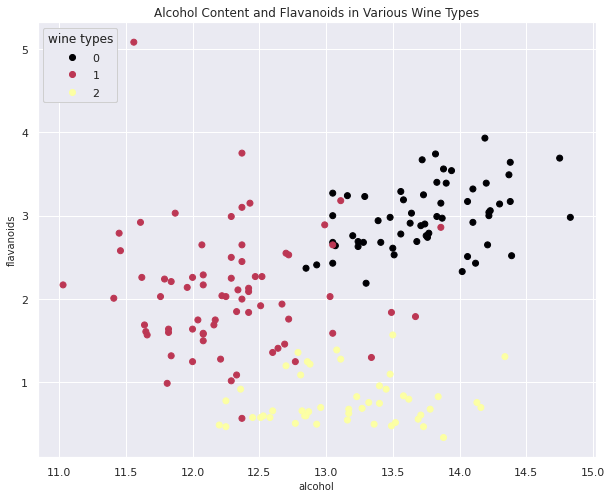

In [5]:
#for training and testing
X = wines[['alcohol', 'flavanoids']]
y = wines.target

#for graphing
a = wines.alcohol
b = wines.flavanoids

fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(a, b, c=y, cmap='inferno')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="wine types")
ax.add_artist(legend1)
ax.set_xlabel(a.name, fontsize = 10)
ax.set_ylabel(b.name, fontsize = 10)
ax.set_title('Alcohol Content and Flavanoids in Various Wine Types')
ax.grid(True)

plt.show()

### Define Functions for KNN

Since the data looks cohesive and useable, define the following functions: 


*   distance: calculate the distance between two points
*   k_nearest_neighbors: finding k neighbors around a point
*   KNN_predict: finding the prediction of the specific point

In [6]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

In [7]:
#predict a point
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]


In [8]:
#predict a label
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k


### Implementation to Train and Test

Use skLearn's train, test, split function to section the input data with training using 70% of the data and testing using 30% of the data

In [9]:
from sklearn.model_selection import train_test_split

X = wines[['alcohol', 'flavanoids']].to_numpy()
y = wines['type'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)
print(f"Test limit is {len(X_test)}")

Test limit is 54


Test specific values that are in the test data set, the limit of which is printed above, here as 54.

To test various values, change the variable 'test_val' below:

In [10]:
# Test the k_nearest_neighbors function
test_val = -6

print(f"The distance between point {test_val-1} and {test_val} is {distance(X[test_val], X[test_val -1])}")

#test the surrounding points
neighbors = k_nearest_neighbors(X_test[test_val], X_train, y_train, 5)
for f_list in neighbors:
  print(f_list[:][1])

#what is the actual label?
print("\nActual Label: ", y_test[test_val])

#predict the actual
knn_p = KNN_Predict(X_test[test_val], X_train, y_train, 5)
print("Prediction Label: ", knn_p)

The distance between point -7 and -6 is 1.4029255147726132
white
white
white
red
white

Actual Label:  white
Prediction Label:  white


Here we get an accurate prediction in which the data points around -7 were white wines, therefore it predicted the point itself was also white wine

### Accuracy

Here we want to test the accuracy of the model as the values of k increase. We can see that as more neighboars are included in the algorithm, the more accurate it becomes and the error decreases

In [11]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [12]:
# Test our function
iter = [1,2,3,4,5,6,7,8,9,10]

for num in iter:
  print(classification_error(X_test, y_test, X_train, y_train, num))

0.1111111111111111
0.1111111111111111
0.09259259259259259
0.09259259259259259
0.09259259259259259
0.09259259259259259
0.09259259259259259
0.07407407407407407
0.05555555555555555
0.05555555555555555


## Fruit Dataset
Now we want to test the KNN model on another dataset with fewer inputs...

### Pre-Processing

---



Before implementing the SVM algorithm, we want to examine the dataframe input and whether any pre-processing needs to occur. Here we are using the Fruit dataset acquired by Dr. Iain Murray from University of Edinburgh.

The dataset has dimensions of 58 rows of various types of fruit by 7 columns of details including mass, color_score, and fruit subtype.

In [13]:
#load and examine the raw contents of the dataset
fruit_df = pd.read_csv('fruit.txt', sep='\t')
fruit_df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [14]:
#check to see if there are missing values from the data
fruit_df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

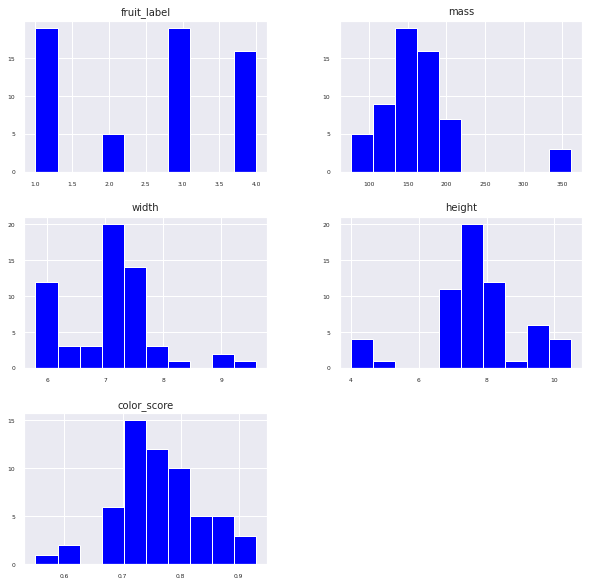

In [15]:
#since there is no data loss, see what the relations are
fig = fruit_df.hist(figsize=(10,10), color='blue', xlabelsize=6, ylabelsize=6)
[x.title.set_size(10) for x in fig.ravel()]
plt.show()

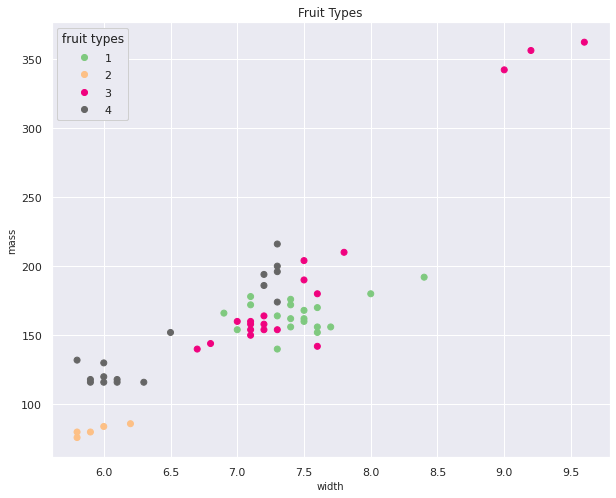

type 1 = apple, type 2 = mandarin, type 3 = orange, type 4 = lemon


In [16]:
#examine the relationship of values from both mass and width
x = fruit_df[['width', 'mass']]
y = fruit_df.fruit_name

fig = figsize=(8,10)
colors = fruit_df.fruit_label

fig, ax = plt.subplots(figsize=(10, 8))
scatter = plt.scatter(x.width,
               x.mass,
               c = colors, cmap='Accent')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="fruit types")

#output the plot with the legend
ax.add_artist(legend1)
ax.set_xlabel(x.width.name, fontsize = 10)
ax.set_ylabel(x.mass.name, fontsize = 10)
ax.set_title('Fruit Types')
ax.grid(True)

plt.show()
print(f"type 1 = apple, type 2 = mandarin, type 3 = orange, type 4 = lemon")

### Implementation to Train and Test

Use skLearn's train, test, split function to section the input data with training using 70% of the data and testing using 30% of the data

In [17]:
X = x.to_numpy()
y = fruit_df.fruit_name.to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)
print(f"Test limit is {len(X_test)}")

Test limit is 18


Test specific values that are in the test data set, the limit of which is printed above, here as 18.

To test various values, change the variable 'test_val' below:

In [18]:
# Test the k_nearest_neighbors function
test_val = -4

print(f"The distance between point {test_val} and {test_val-1} is {distance(X[test_val], X[test_val - 1])}")

#test the surrounding points
neighbors = k_nearest_neighbors(X_test[test_val], X_train, y_train, 5)
for f_list in neighbors:
  print(f_list[:][1])

#what is the actual label?
print("\nActual Label: ", y_test[test_val])

#predict the actual
knn_p = KNN_Predict(X_test[test_val], X_train, y_train, 5)
print("Prediction Label: ", knn_p)

The distance between point -4 and -5 is 0.20000000000000018
apple
orange
apple
lemon
apple

Actual Label:  apple
Prediction Label:  apple


Here we get an accurate prediction in which the data points around -4 were a mix of apple, orange, and lemon, with a majority of apple neighbors. Therefore the model accurately predicted the point itself was also an apple

### Accuracy

Here we want to test the accuracy of the model as the values of k increase. We can see that as more neighboars are included in the algorithm, the accuracy flucuates a bit between 2/3s to 1/2 accurate. These are not optimal results since this is similar to a coin toss in which there can be a lucky guess.

In [19]:
# Test our function
iter = [1,2,3,4,5,6,7,8,9,10]

for num in iter:
  print(classification_error(X_test, y_test, X_train, y_train, num))

0.3333333333333333
0.3333333333333333
0.5
0.5555555555555556
0.5555555555555556
0.5
0.3333333333333333
0.5
0.5555555555555556
0.5


Based on this accuracy, we want to see another output of the fruit dataset to see whether we can see this drastic range of innacuracy:

In this iteration, we test value -1

In [20]:
# Test the k_nearest_neighbors function
test_val = -1

print(f"The distance between point {test_val} and {test_val-1} is {distance(X[test_val], X[test_val - 1])}")

#test the surrounding points
neighbors = k_nearest_neighbors(X_test[test_val], X_train, y_train, 5)
for f_list in neighbors:
  print(f_list[:][1])

#what is the actual label?
print("\nActual Label: ", y_test[test_val])

#predict the actual
knn_p = KNN_Predict(X_test[test_val], X_train, y_train, 5)
print("Prediction Label: ", knn_p)

The distance between point -1 and -2 is 34.00235285976546
mandarin
lemon
lemon
lemon
lemon

Actual Label:  mandarin
Prediction Label:  lemon


Looking at the results of test_val = -1, we can see that the actual label, 'mandarin' is completely surrounded by 'lemon', therefore the model believes that the test value should be the same.

It is worth noting that the distance that is printed out at the top of the most recent results shows that the distance between test value -1 and -2 (a neighbor) is 34! Compared to the other iterations in which the distance within 0.1 to 2.0, this is a considerable difference and is likely the culprit of the innaccurate labeling.

## Final Thoughts:

This shows the variability and importance of choosing a good input dataset to run such algorithms. We know that the model works well based upon the wine implementation, but the fruit implementation does not provide enough data points to properly demonstrate the model